In [241]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

In [243]:
# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#Código para cargar el dfset

# URL 
url = "https://raw.githubusercontent.com/adeulofeu/TFM/refs/heads/main/data/dataset_modelos.csv"

# Cargar dfSet en un dfFrame de Panda
data = pd.read_csv(url, delimiter=",", encoding="utf-8", on_bad_lines="skip")

# Primeras 5 filas del dfset
print(data.head())

   Unnamed: 0       Fecha  Demanda Energia SIN kWh  Generación kWh  \
0           0  2007-01-01             1.098662e+08    1.133512e+08   
1           1  2007-01-02             1.323110e+08    1.353954e+08   
2           2  2007-01-03             1.388197e+08    1.421048e+08   
3           3  2007-01-04             1.405693e+08    1.439118e+08   
4           4  2007-01-05             1.410687e+08    1.442180e+08   

   Demanda No Atendida kWh  Exportaciones kWh  Importaciones kWh  Población  \
0                  14410.0         3499392.00                NaN   42658630   
1                   5910.0         3299095.66           208776.0   42658630   
2                  10070.0         3295124.41                NaN   42658630   
3                  19150.0         3361720.48                NaN   42658630   
4                 161380.0         3310620.07                NaN   42658630   

   Temp_BOGOTA  Temp_ANTIOQUIA  Temp_VALLE DEL CAUCA  Temp_ATLANTICO  \
0    13.458333       20.046262  

In [246]:
# Convertir la columna 'Fecha' a formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [249]:
# Establecer 'Fecha' como índice
data.set_index('Fecha', inplace=True)

In [251]:
data.sort_index()

,Unnamed: 0,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
Fecha,,,,,,,,,,,,,,,,,
2007-01-01,0,1.098662e+08,1.133512e+08,14410.0,3499392.00,NaN,42658630,13.458333,20.046262,23.500690,27.483333,28.254167,15.136742,21.241667,19.148125,24.793750,26.762500
2007-01-02,1,1.323110e+08,1.353954e+08,5910.0,3299095.66,208776.00,42658630,13.854167,20.144860,23.591034,27.595833,28.347826,15.391473,21.127143,18.432298,25.540426,27.483333
2007-01-03,2,1.388197e+08,1.421048e+08,10070.0,3295124.41,NaN,42658630,13.858333,20.355288,23.532168,27.345833,27.854167,15.301961,20.230556,18.647799,25.197872,26.754167
2007-01-04,3,1.405693e+08,1.439118e+08,19150.0,3361720.48,NaN,42658630,14.137500,19.365196,22.783333,27.125000,27.383333,15.016988,20.411429,19.040000,24.765957,26.987500
2007-01-05,4,1.410687e+08,1.442180e+08,161380.0,3310620.07,NaN,42658630,14.169565,19.649275,23.177778,26.595652,27.762500,15.871094,20.475000,19.773856,24.429167,26.429167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6203,2.222968e+08,2.227606e+08,431130.0,900525.04,5571.78,52215503,14.489313,15.786195,34.000000,28.009054,28.638246,15.813183,24.681915,20.781655,29.125171,25.601667
2023-12-28,6204,2.212095e+08,2.211956e+08,1600.0,2787.56,15077.68,52215503,14.489313,15.786195,30.700000,27.780405,28.638246,15.643810,25.523538,20.500995,29.669660,25.601667
2023-12-29,6205,2.162844e+08,2.167466e+08,44720.0,519583.88,12665.88,52215503,14.489313,15.786195,28.352778,28.223212,28.638246,15.298540,25.385221,20.401481,28.628650,25.601667


In [340]:
# Asegurar que todas las características están llenas
data.ffill(inplace=True)

In [342]:
# Definir las características (Temperatura, Población) y la variable objetivo (Demanda de Energía)
X = data[['Temp_BOGOTA','Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 
          'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 
          'Temp_CESAR', 'Temp_META', 'Población']] #.fillna(0  # Rellenar valores faltantes con cero
y = data['Demanda Energia SIN kWh']

In [379]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [381]:
# Configuración del modelo Random Forest
model = RandomForestRegressor(random_state=42)

# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Selección del mejor modelo
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [382]:
# Predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Cálculo de métricas 
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"MSE (Entrenamiento): {mse_train:.4f}")
print(f"MSE (Prueba): {mse_test:.4f}")
print(f"R2 (Entrenamiento): {r2_train:.4f}")
print(f"R2 (Prueba): {r2_test:.4f}")
print(f"MAE (Entrenamiento): {mae_train:.4f}")
print(f"MAE (Prueba): {mae_test:.4f}")
print(f"MAPE (Entrenamiento): {mape_train:.4f}%")
print(f"MAPE (Prueba): {mape_test:.4f}%")

MSE (Entrenamiento): 59347402265738.2422
MSE (Prueba): 130571070372489.9219
R2 (Entrenamiento): 0.9067
R2 (Prueba): 0.7923
MAE (Entrenamiento): 6132868.4490
MAE (Prueba): 9021453.0214
MAPE (Entrenamiento): 3.6424%
MAPE (Prueba): 5.3845%


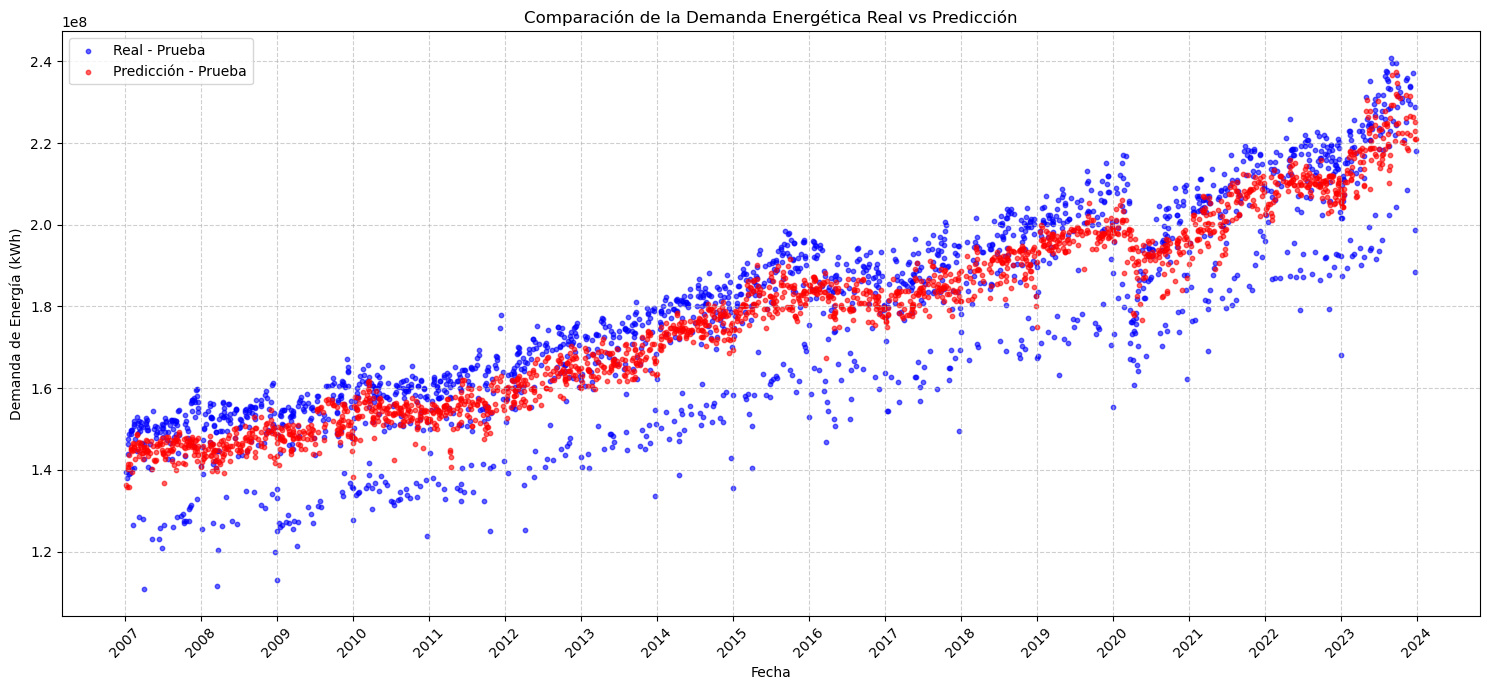

In [383]:
# Configurar la figura
plt.figure(figsize=(15, 7))

# Graficar los datos reales y predicciones **solo para el conjunto de prueba**
plt.scatter(X_test.index, y_test, label='Real - Prueba', color='blue', alpha=0.6, s=10)
plt.scatter(X_test.index, y_test_pred, label='Predicción - Prueba', color='red', alpha=0.6, s=10)

# Configurar título y etiquetas
plt.title('Comparación de la Demanda Energética Real vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Energía (kWh)')

# Configurar leyenda y rejilla
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Formato del eje X con fechas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Mostrar marcas cada año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año en etiquetas

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

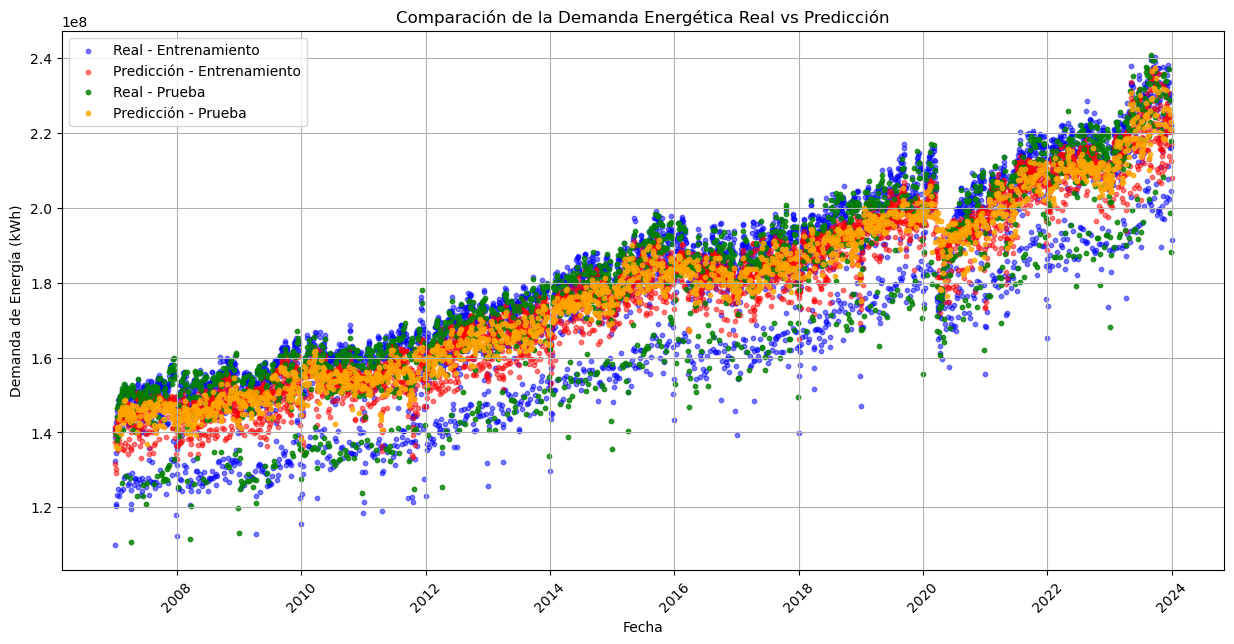

In [395]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Graficar los puntos para los datos reales y las predicciones
plt.scatter(X_train.index, y_train, label="Real - Entrenamiento", color='blue', alpha=0.5, s=10)
plt.scatter(X_train.index, best_model.predict(X_train), label="Predicción - Entrenamiento", color='red', alpha=0.5, s=10)

plt.scatter(X_test.index, y_test, label="Real - Prueba", color='green', alpha=0.8, s=10)
plt.scatter(X_test.index, best_model.predict(X_test), label="Predicción - Prueba", color='orange', alpha=0.8, s=10)

# Configurar títulos y etiquetas
plt.title('Comparación de la Demanda Energética Real vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Energía (kWh)')
plt.legend()
plt.grid(True)

# Ajustar los ejes para evitar la superposición de valores
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

In [397]:
# Pruebas de normalidad y heterocedasticidad
y_pred = best_model.predict(X_test)  # Asegúrate de predecir solo en X_test
y_pred = pd.Series(y_pred, index=X_test.index)  # Alinearlo con el índice de X_test

residuos = y_test - y_pred  # Ahora la resta debería funcionar sin problemas
residuos_train = y_train - y_train_pred

X_test_bp = sm.add_constant(X_test)  # Agregar una constante para el test

jb_test = jarque_bera(residuos)
bp_test = het_breuschpagan(residuos, X_test_bp)
lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)

print(f'Jarque-Bera Statistic: {jb_test[0]}, p-value: {jb_test[1]}')
print(f'Breusch-Pagan Statistic: {bp_test[0]}, p-value: {bp_test[1]}')
print(f'Ljung-Box Statistic: {lb_test.iloc[0, 0]}, p-value: {lb_test.iloc[0, 1]}')

Jarque-Bera Statistic: 403.8127872843127, p-value: 2.0566831037572763e-88
Breusch-Pagan Statistic: 18.055787653531745, p-value: 0.08029513713479851
Ljung-Box Statistic: 8.810165376405905, p-value: 0.5502095000367143


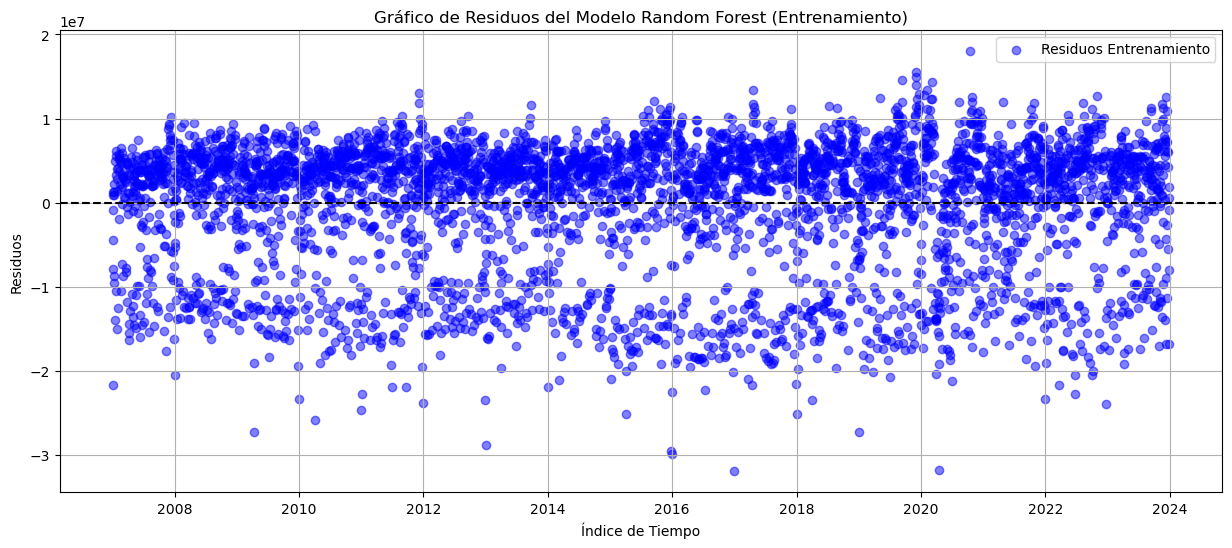

In [399]:
# Gráfico de residuos en entrenamiento
plt.figure(figsize=(15, 6))
plt.scatter(X_train.index, residuos_train, color='blue', alpha=0.5, label="Residuos Entrenamiento")
plt.axhline(y=0, color='black', linestyle='--')  # Línea base en cero
plt.title('Gráfico de Residuos del Modelo Random Forest (Entrenamiento)')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

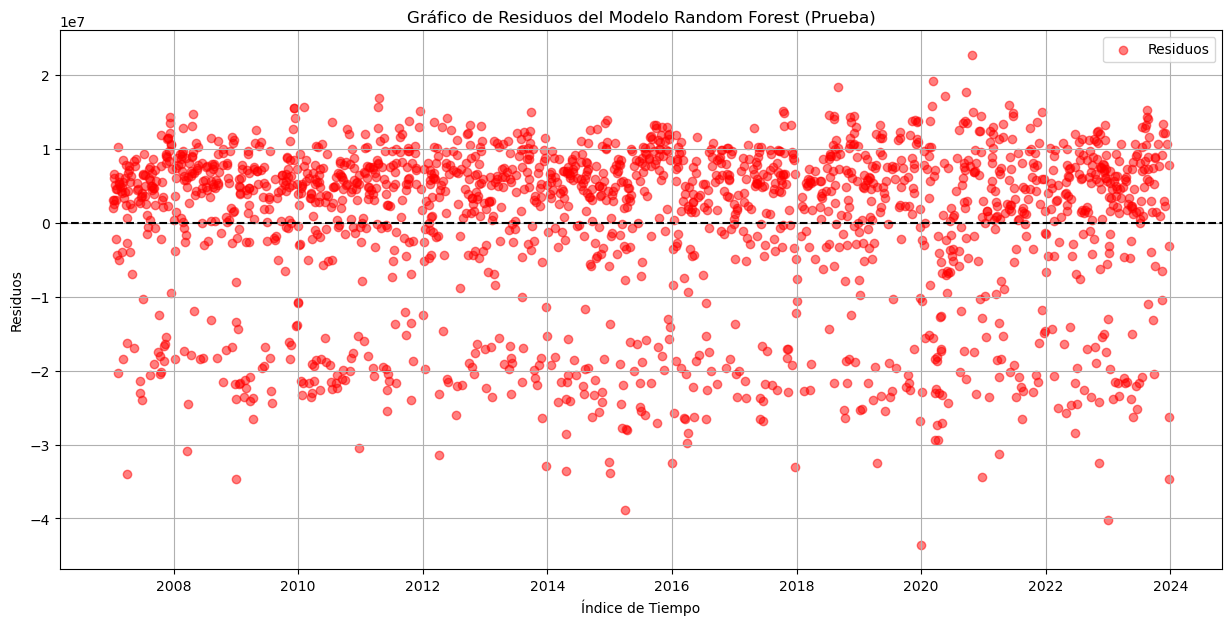

In [393]:
# Gráfico de residuos
plt.figure(figsize=(15, 7))
plt.scatter(X_test.index, residuos, color='red', alpha=0.5, label='Residuos')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title('Gráfico de Residuos del Modelo Random Forest (Prueba)')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

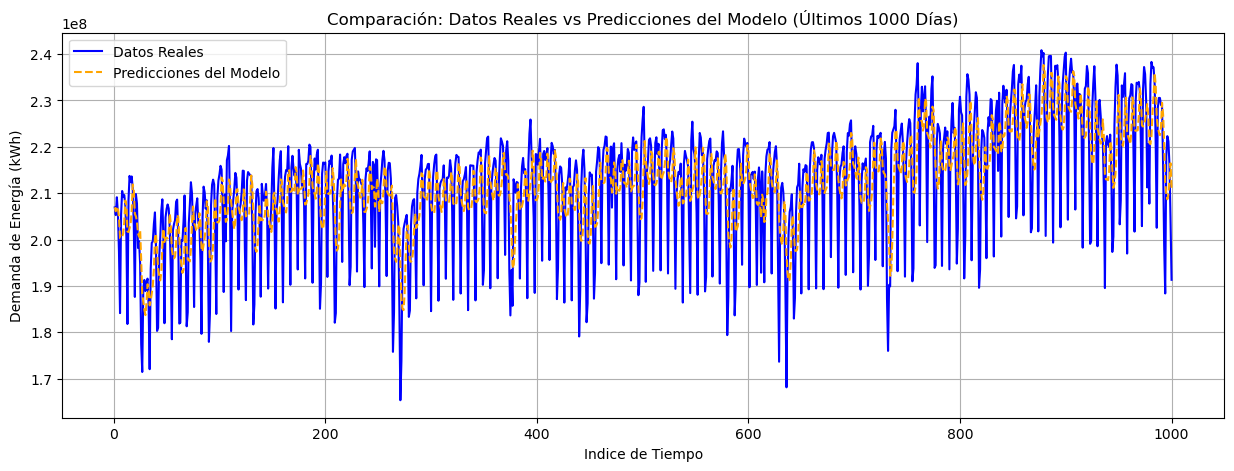

In [353]:
# Filtrar los últimos 1000 días de datos
data_filtered = data.iloc[-1000:].copy()

# Crear una nueva columna de índice de tiempo relativo (número de día)
data_filtered["Día"] = range(1, len(data_filtered) + 1)

# Crear la gráfica con el nuevo eje X basado en el número de días
plt.figure(figsize=(15, 5))

# Graficar los datos reales con línea sólida azul
plt.plot(data_filtered["Día"], data_filtered["Demanda Energia SIN kWh"], label="Datos Reales", color="blue", linestyle="-")

# Graficar la serie de predicciones con línea punteada naranja (Ejemplo con media móvil)
pred_series_filtered = data_filtered["Demanda Energia SIN kWh"].rolling(window=5, min_periods=1).mean()
plt.plot(data_filtered["Día"], pred_series_filtered, label="Predicciones del Modelo", color="orange", linestyle="dashed")

# Configuración del gráfico
plt.title("Comparación: Datos Reales vs Predicciones del Modelo (Últimos 1000 Días)")
plt.xlabel("Indice de Tiempo")
plt.ylabel("Demanda de Energía (kWh)")
plt.legend()
plt.grid(True)

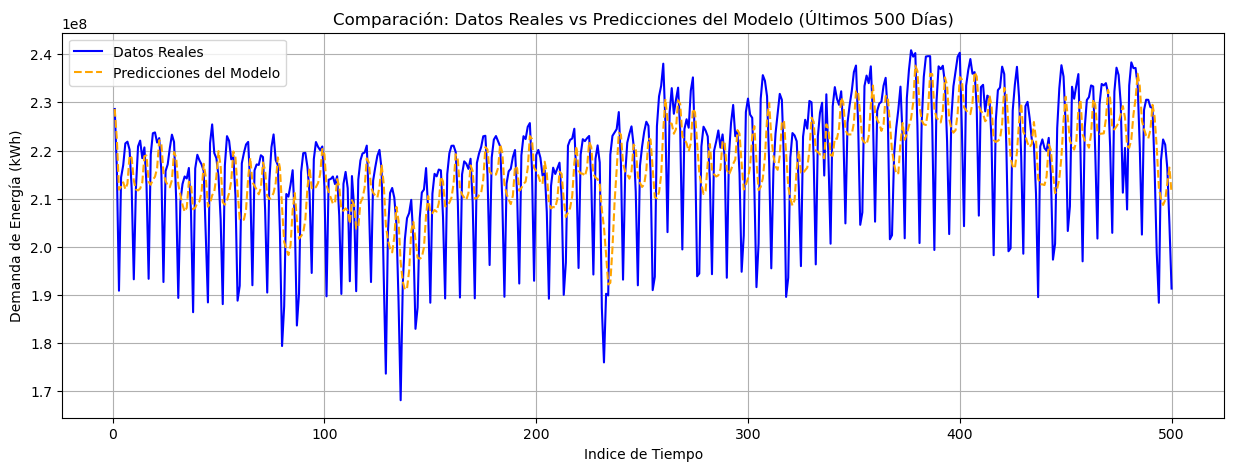

In [354]:
# Filtrar los últimos 500 días de datos
data_filtered = data.iloc[-500:].copy()

# Crear una nueva columna de índice de tiempo relativo (número de día)
data_filtered["Día"] = range(1, len(data_filtered) + 1)

# Crear la gráfica con el nuevo eje X basado en el número de días
plt.figure(figsize=(15, 5))

# Graficar los datos reales con línea sólida azul
plt.plot(data_filtered["Día"], data_filtered["Demanda Energia SIN kWh"], label="Datos Reales", color="blue", linestyle="-")

# Graficar la serie de predicciones con línea punteada naranja (Ejemplo con media móvil)
pred_series_filtered = data_filtered["Demanda Energia SIN kWh"].rolling(window=5, min_periods=1).mean()
plt.plot(data_filtered["Día"], pred_series_filtered, label="Predicciones del Modelo", color="orange", linestyle="dashed")

# Configuración del gráfico
plt.title("Comparación: Datos Reales vs Predicciones del Modelo (Últimos 500 Días)")
plt.xlabel("Indice de Tiempo")
plt.ylabel("Demanda de Energía (kWh)")
plt.legend()
plt.grid(True)

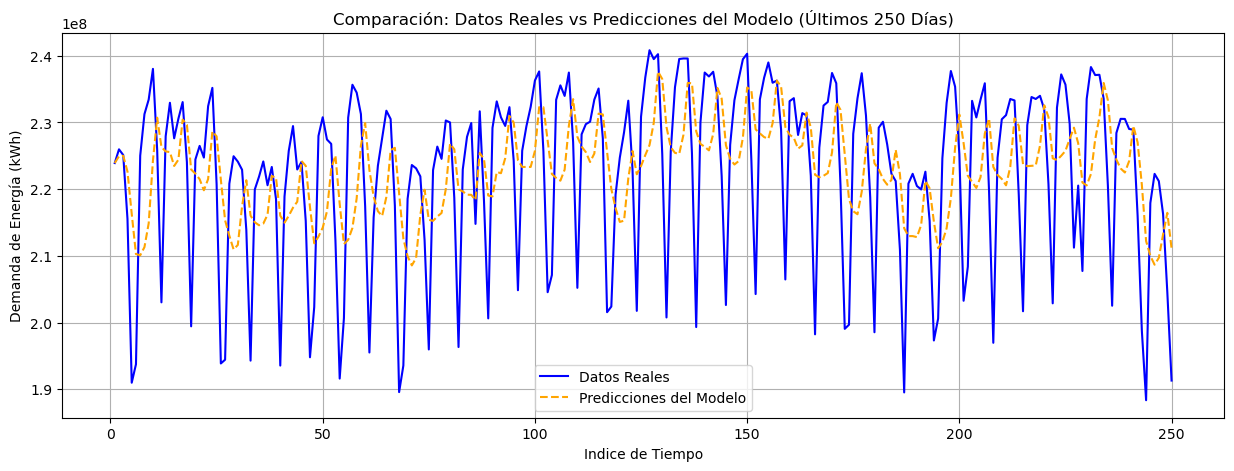

In [355]:
# Filtrar los últimos 1000 días de datos
data_filtered = data.iloc[-250:].copy()

# Crear una nueva columna de índice de tiempo relativo (número de día)
data_filtered["Día"] = range(1, len(data_filtered) + 1)

# Crear la gráfica con el nuevo eje X basado en el número de días
plt.figure(figsize=(15, 5))

# Graficar los datos reales con línea sólida azul
plt.plot(data_filtered["Día"], data_filtered["Demanda Energia SIN kWh"], label="Datos Reales", color="blue", linestyle="-")

# Graficar la serie de predicciones con línea punteada naranja (Ejemplo con media móvil)
pred_series_filtered = data_filtered["Demanda Energia SIN kWh"].rolling(window=5, min_periods=1).mean()
plt.plot(data_filtered["Día"], pred_series_filtered, label="Predicciones del Modelo", color="orange", linestyle="dashed")

# Configuración del gráfico
plt.title("Comparación: Datos Reales vs Predicciones del Modelo (Últimos 250 Días)")
plt.xlabel("Indice de Tiempo")
plt.ylabel("Demanda de Energía (kWh)")
plt.legend()
plt.grid(True)